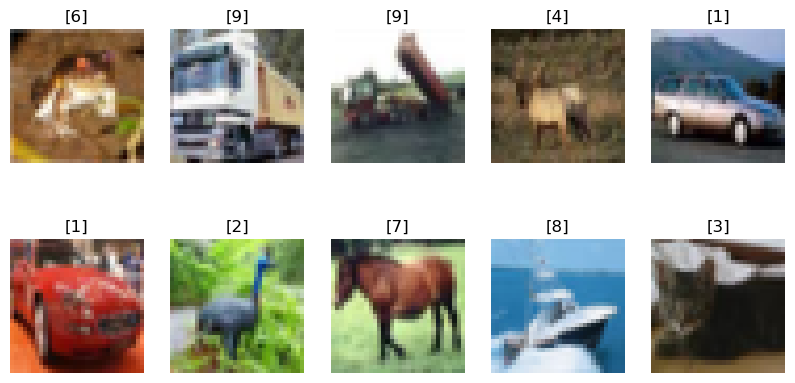

In [1]:
# Load the CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Plot the first 10 images from the training set
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i])
    axes[i].set_title(y_train[i])
    axes[i].axis('off')
plt.show()

In [3]:
from sklearn.decomposition import PCA
import numpy as np

# Normalize pixel values
x_train = x_train.astype('float32') / 255

# Flatten images
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

# Compute covariance matrix
cov_matrix = np.cov(x_train_flattened, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# Select top k eigenvectors
k = 50
top_k_eigenvectors = eigenvectors[:, :k]

# Project data onto new subspace
x_train_pca = x_train_flattened.dot(top_k_eigenvectors)

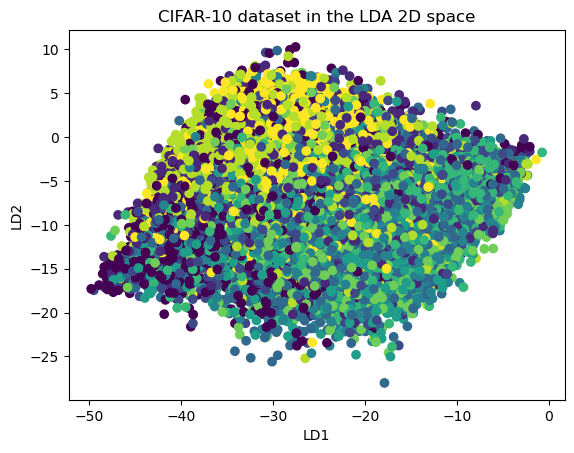

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('CIFAR-10 dataset in the LDA 2D space')
plt.show()

In [7]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# reshape the data
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# create a LDA object
lda = LinearDiscriminantAnalysis(n_components=3)

# fit the LDA on the training set
lda.fit(x_train, y_train)

# transform the training and test sets
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


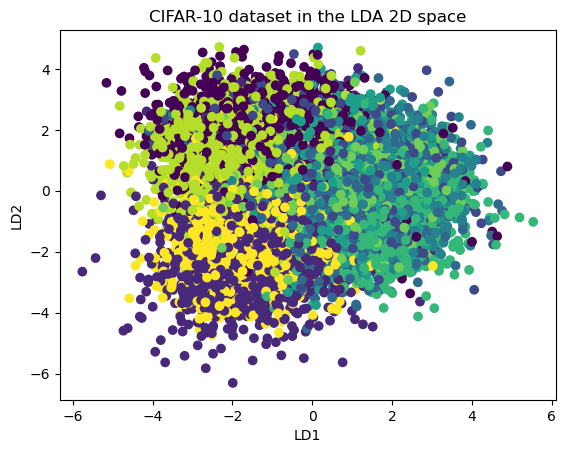

In [9]:
import matplotlib.pyplot as plt

# Plot the training set
plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('CIFAR-10 dataset in the LDA 2D space')
plt.show()

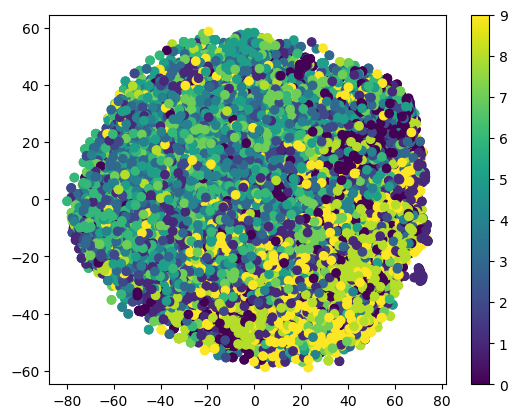

In [11]:
from sklearn.manifold import TSNE
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X = x_train.reshape(x_train.shape[0], -1)
y = y_train.reshape(-1)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.show()

In [12]:
# with TSNE

from sklearn.cluster import KMeans

# create a KMeans object
kmeans = KMeans(n_clusters=10, random_state=0)

# fit the KMeans on the t-SNE transformed data
kmeans.fit(X_tsne)

# predict the cluster labels
y_predX_tsne = kmeans.predict(X_tsne)

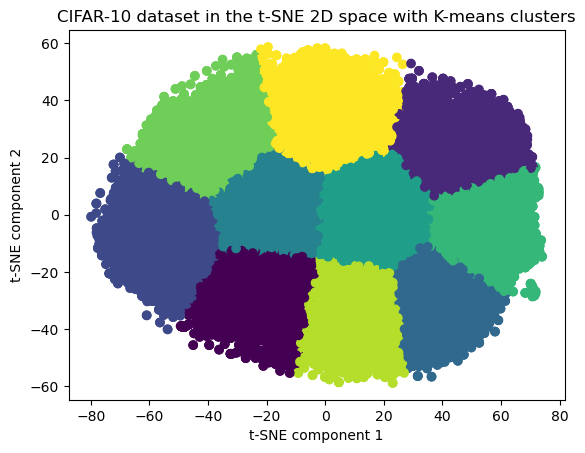

In [15]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_predX_tsne)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
plt.show()

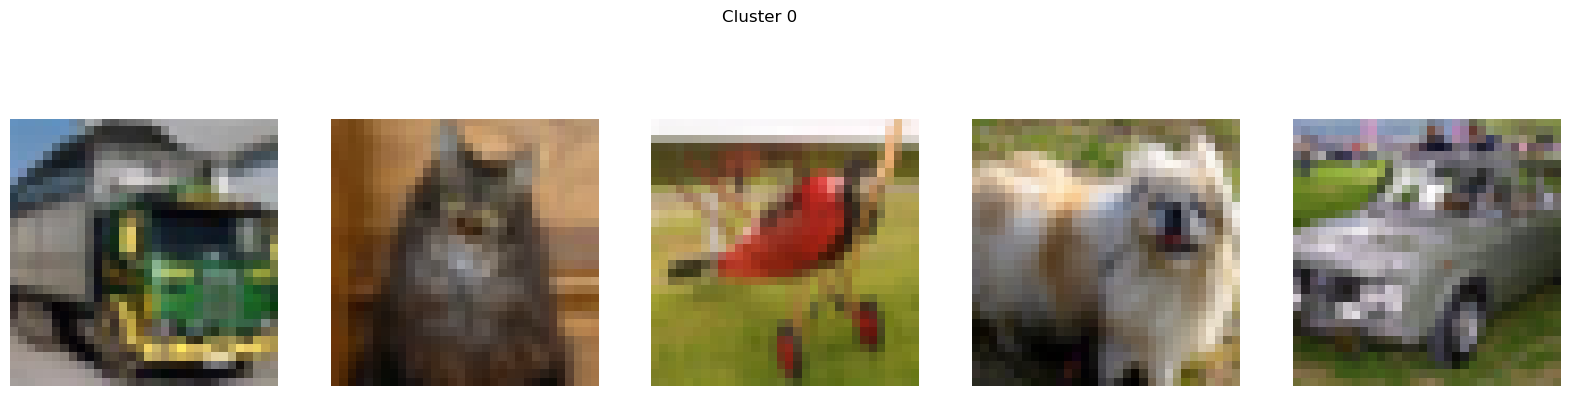

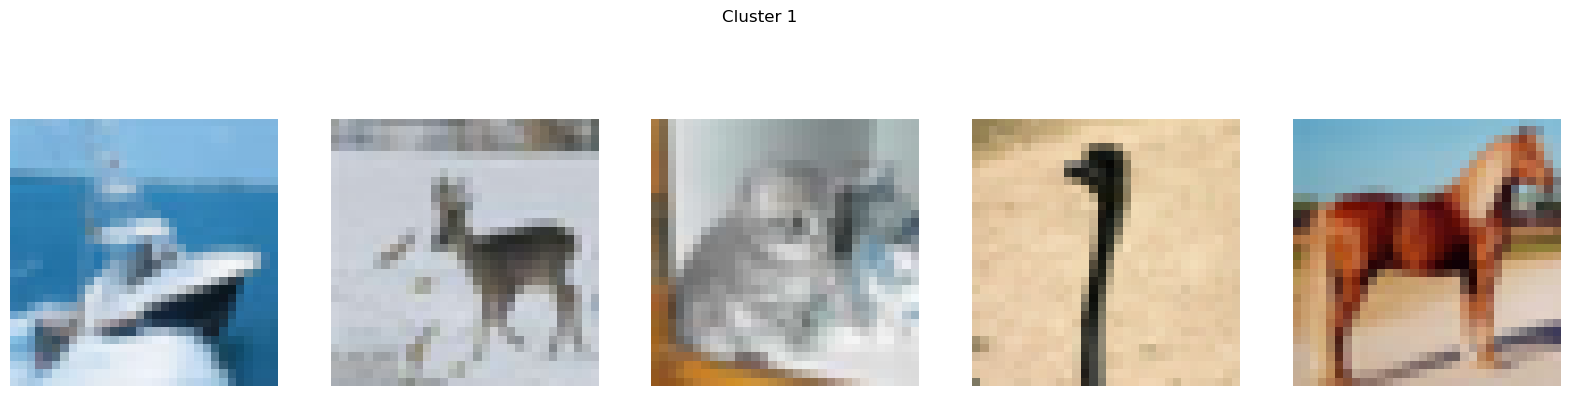

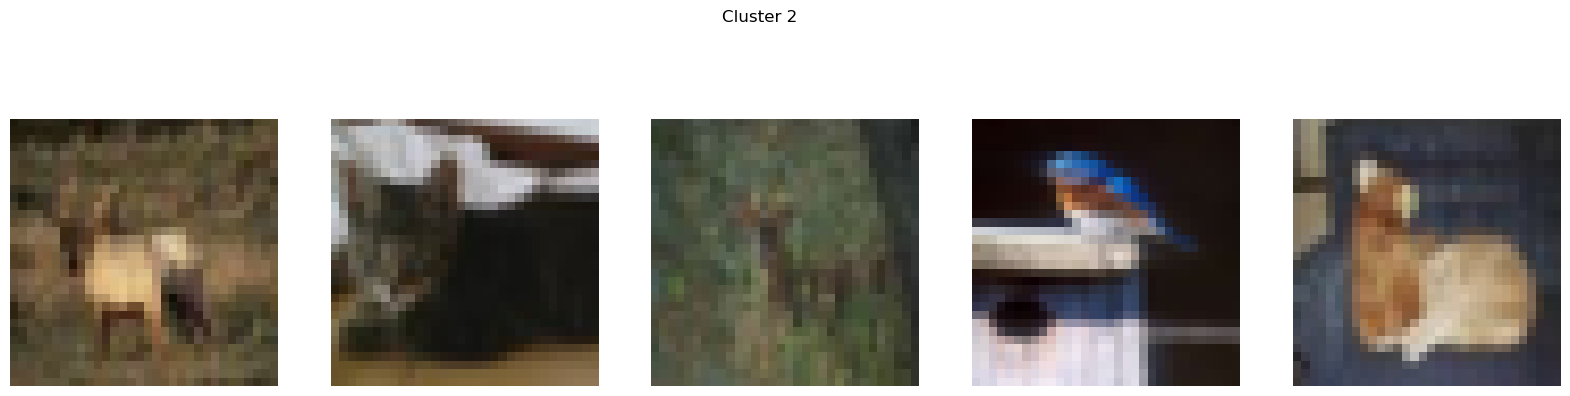

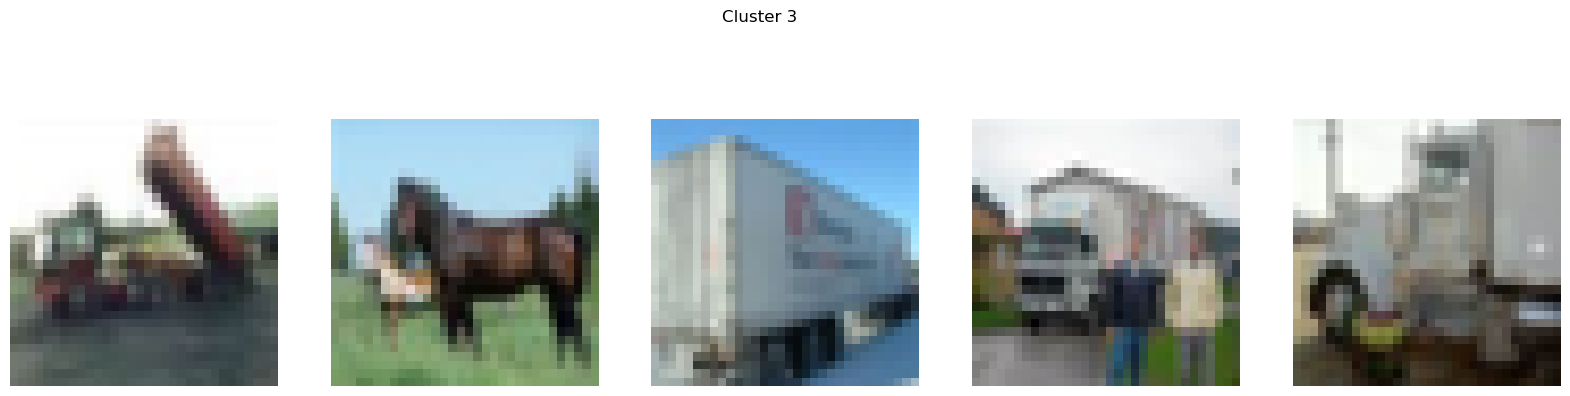

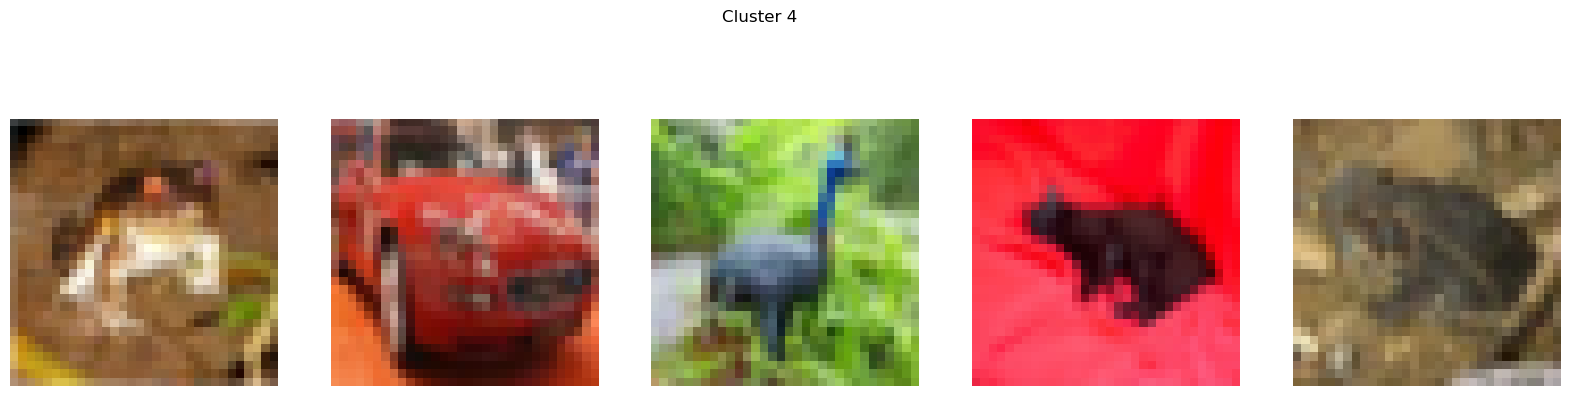

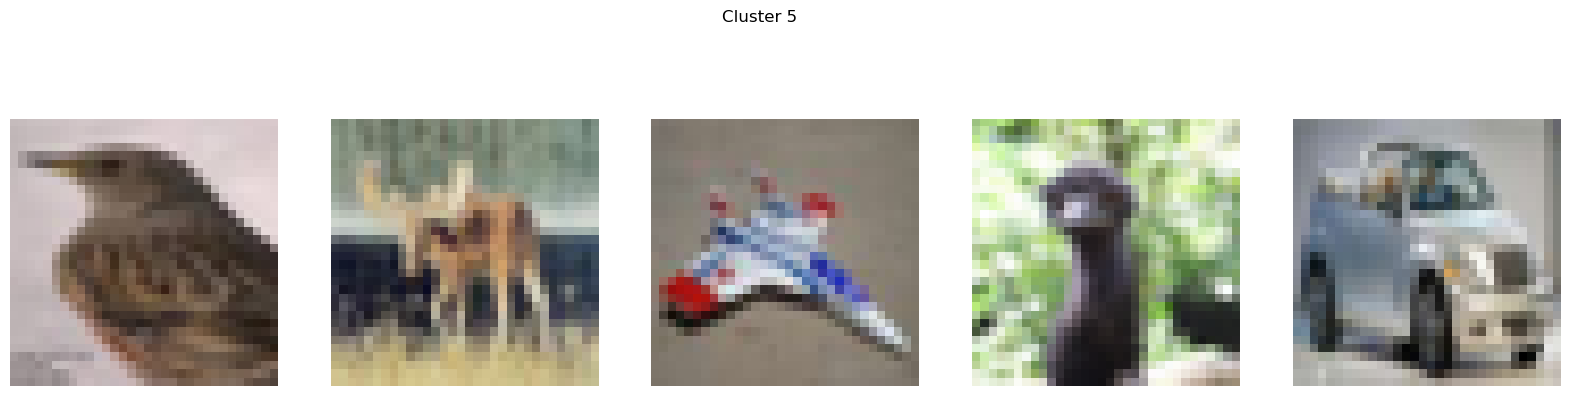

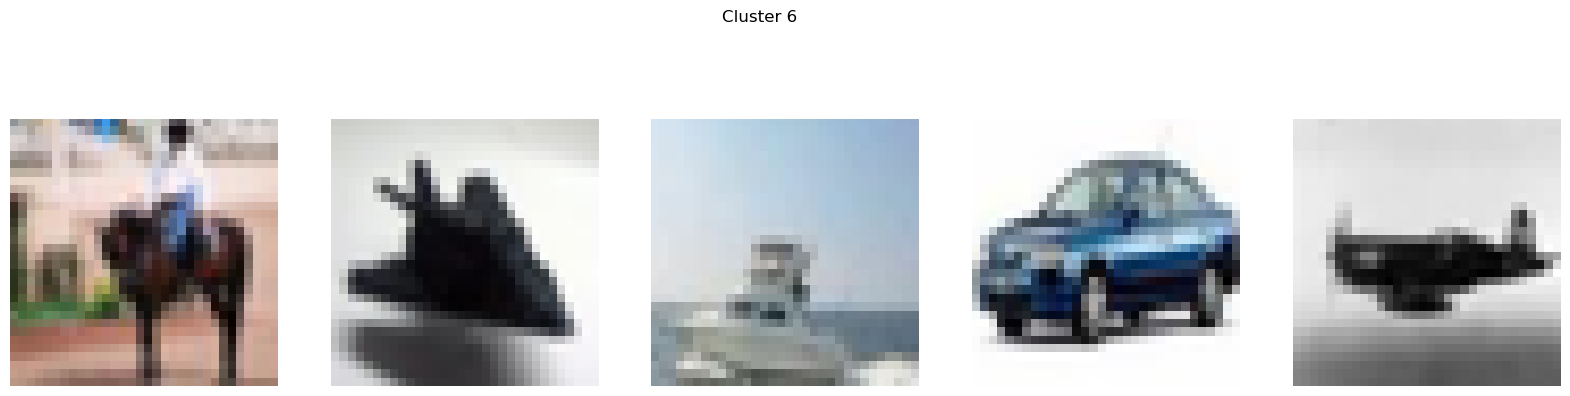

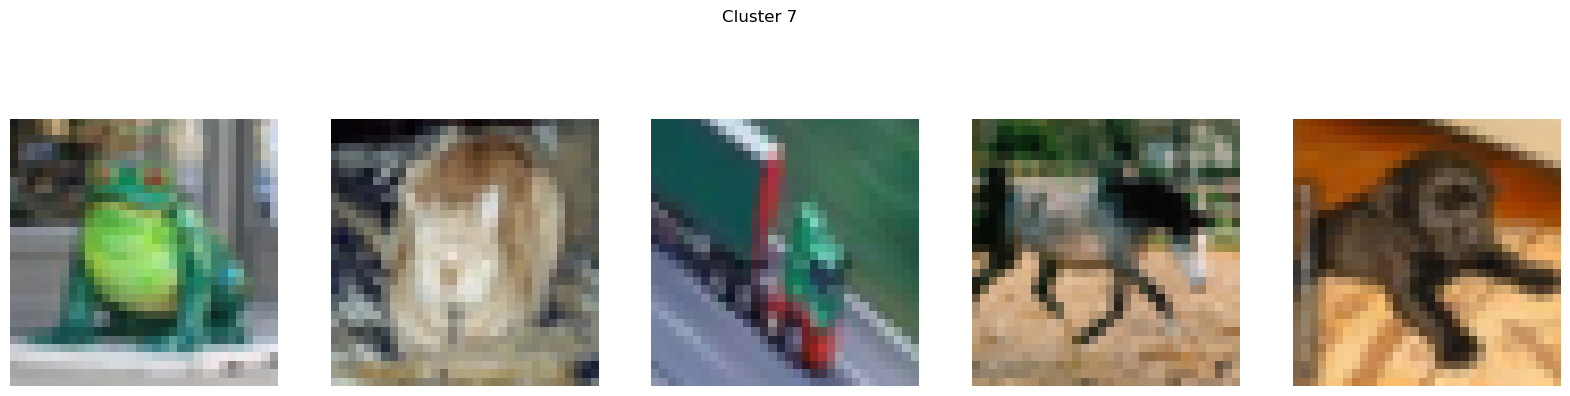

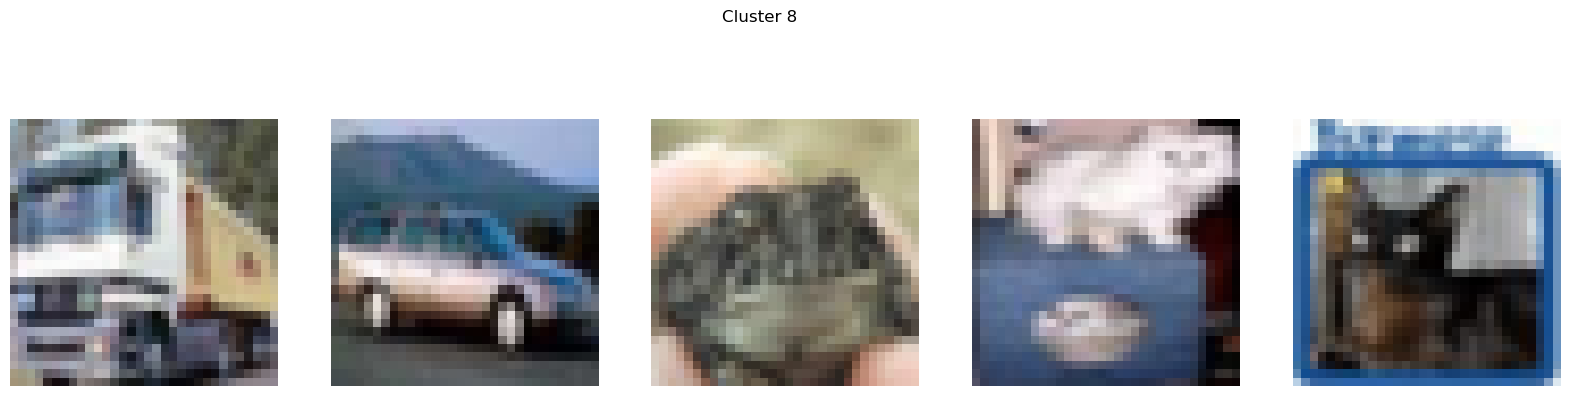

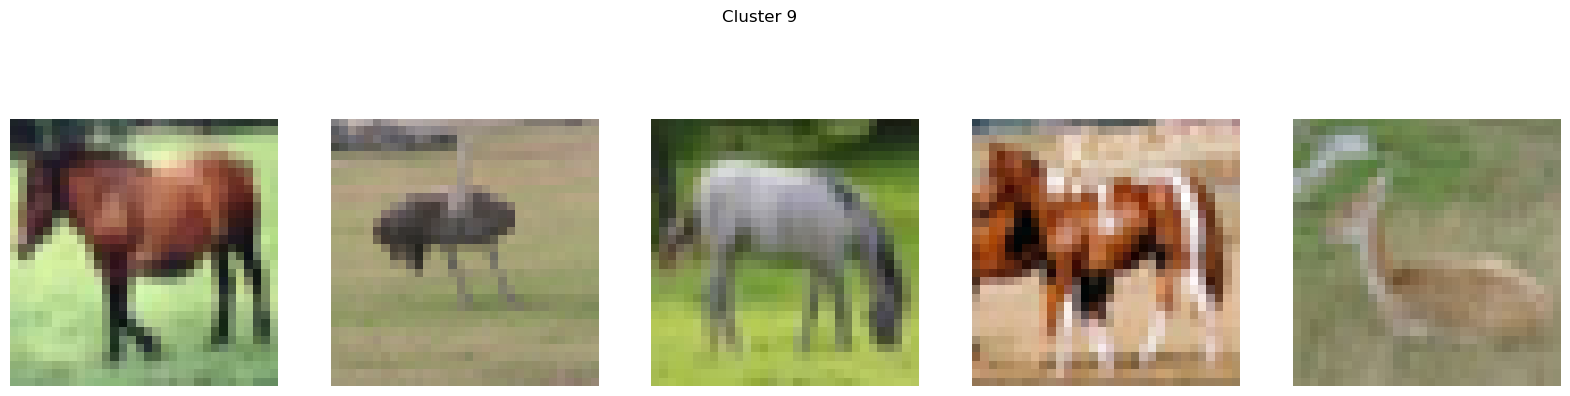

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_train contains the CIFAR-10 images and is already loaded
# n_images represents the number of images to display per cluster
n_images = 5

for i in range(10):  # Loop through each of the 10 clusters
    # Get the indices of the data points that belong to the current cluster
    cluster_indices = np.where(y_predX_tsne == i)[0]
    
    # Create a figure with subplots (1x3 grid, for 3 images)
    fig, axs = plt.subplots(1, n_images, figsize=(20, 5))
    
    for j in range(n_images):
        # Get the image from the training set corresponding to the cluster index
        image = x_train[cluster_indices[j]]
        
        # Display the image in the subplot
        axs[j].imshow(image)
        axs[j].axis('off')  # Turn off axis labels for a clean display
    
    plt.suptitle(f'Cluster {i}')  # Title indicating the cluster number
    plt.show()  # Display the figure

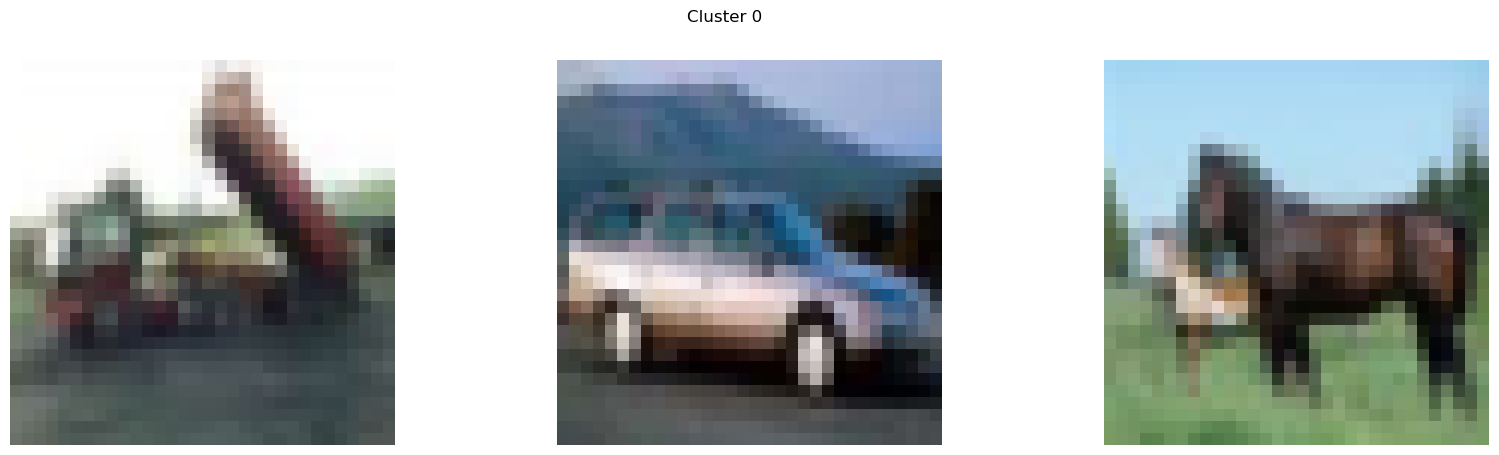

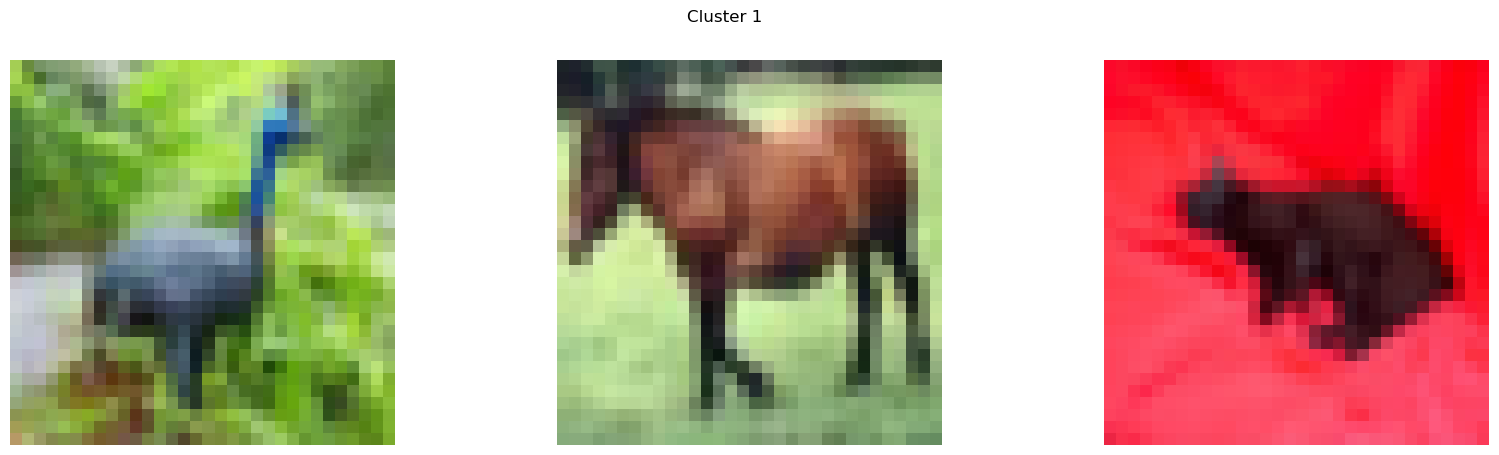

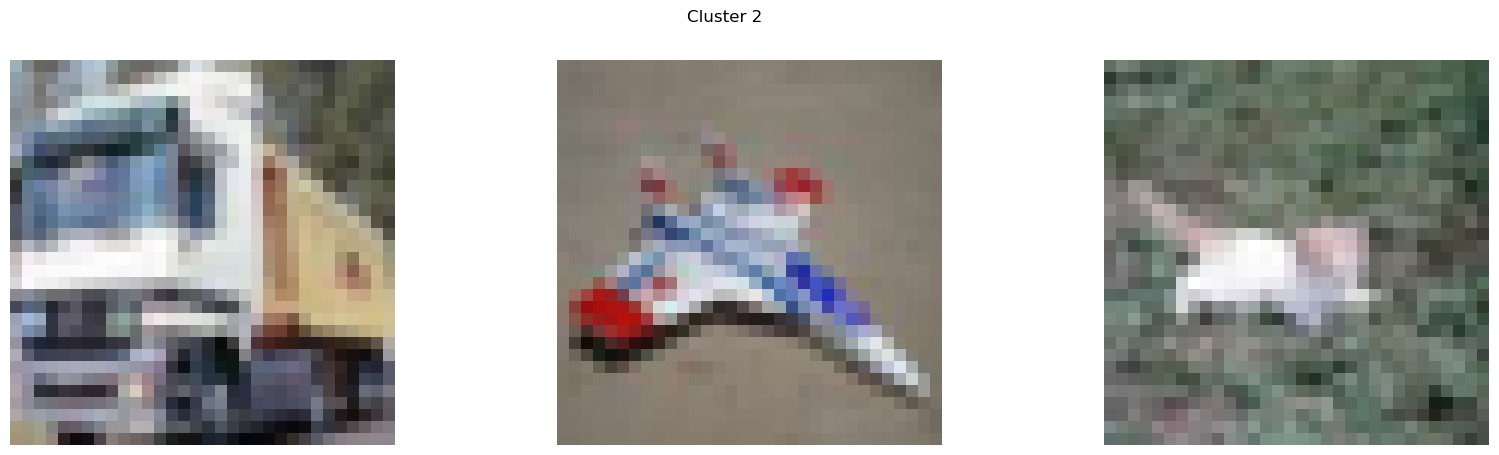

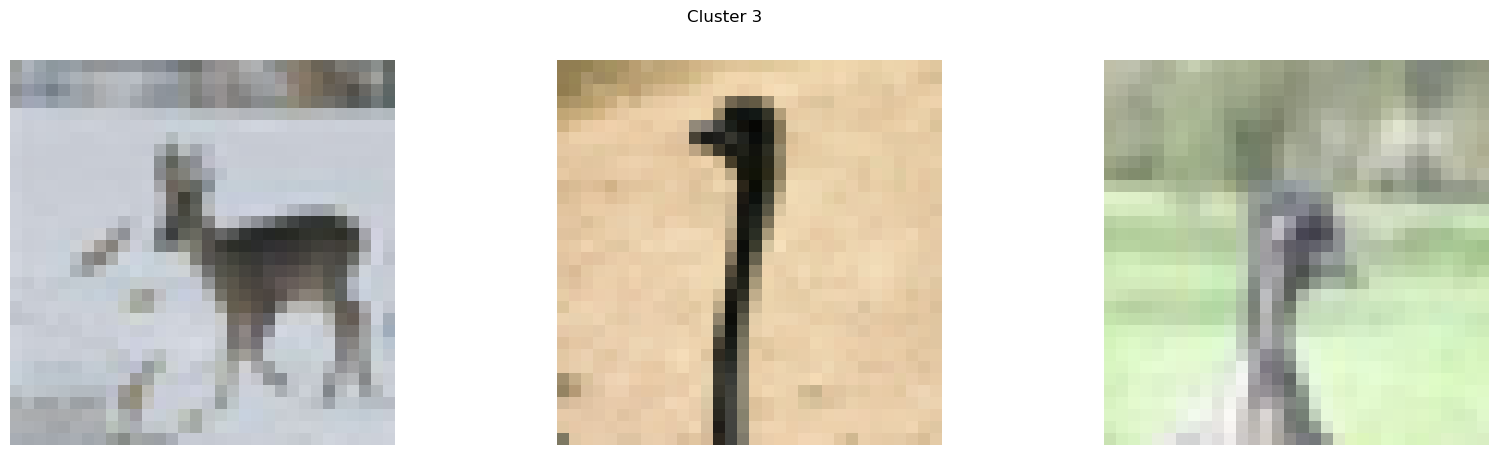

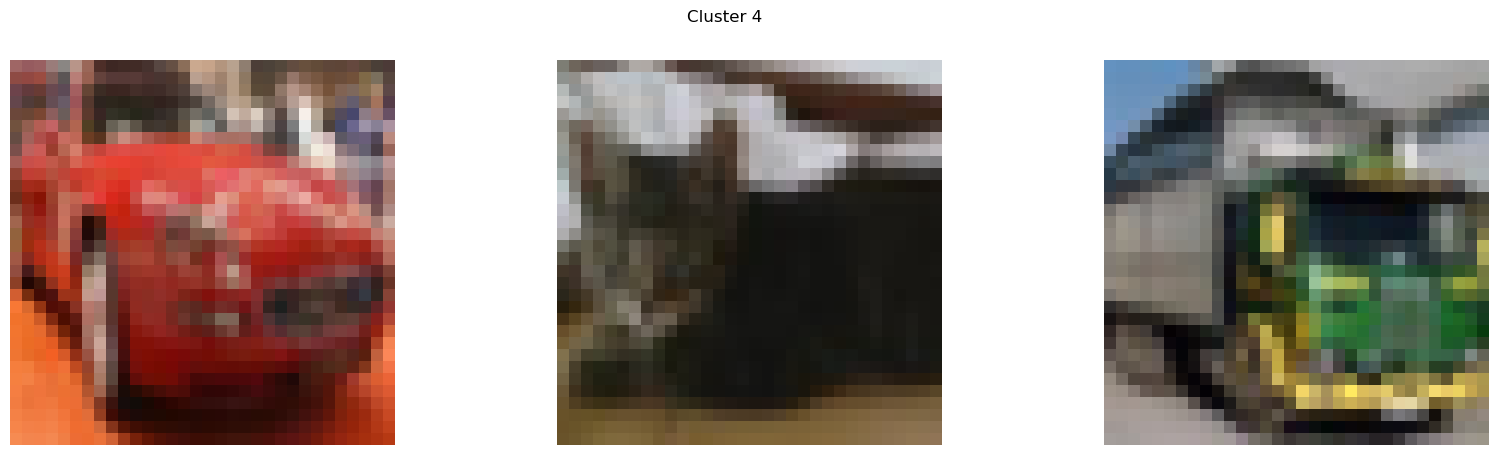

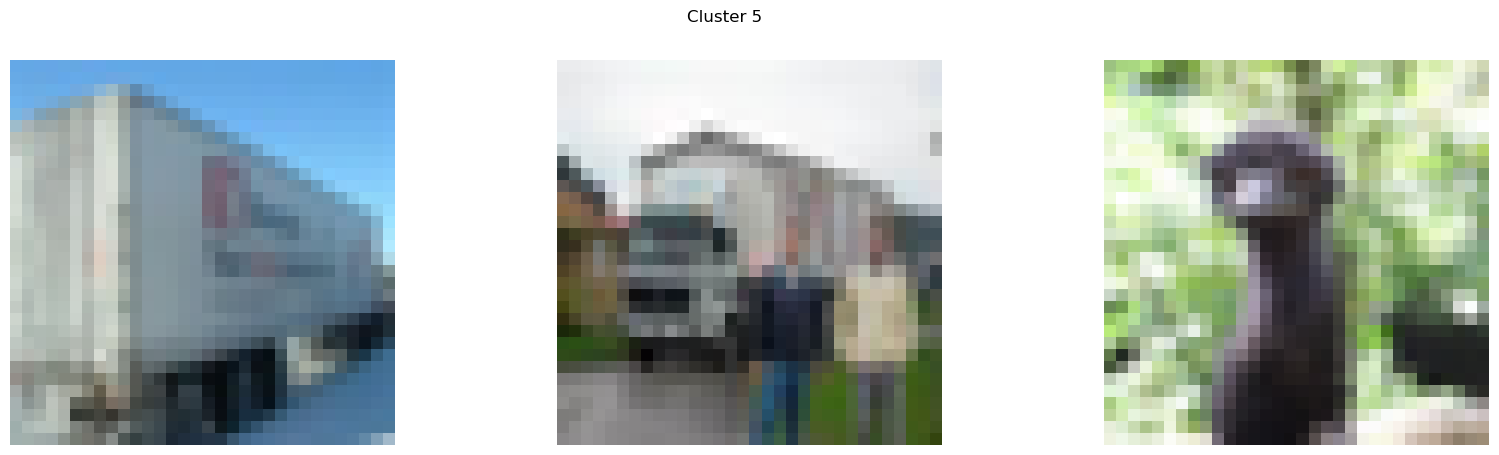

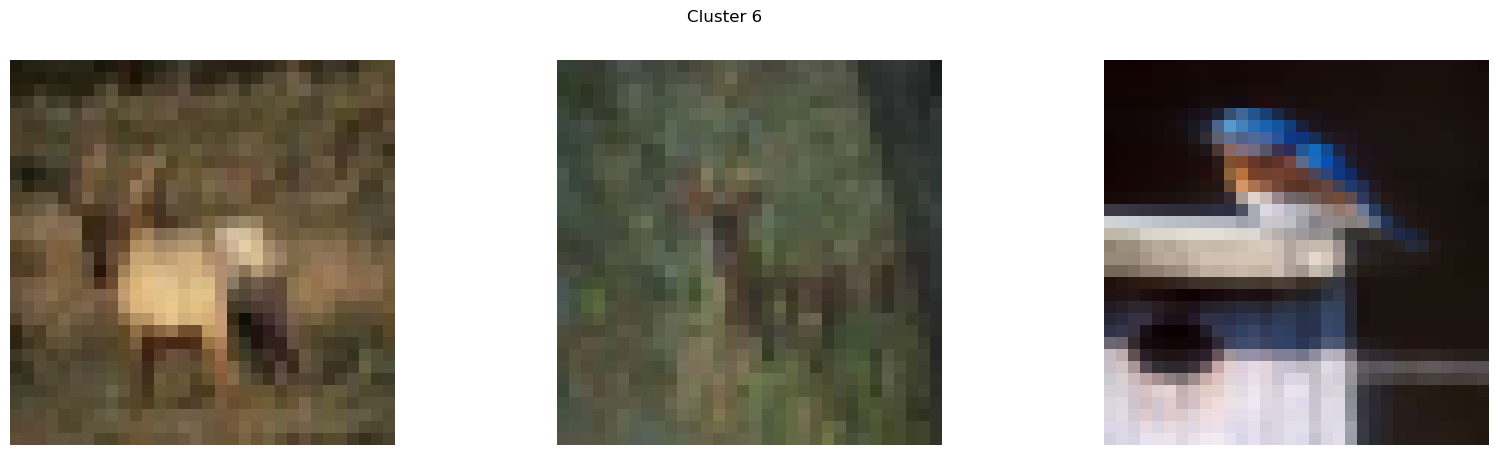

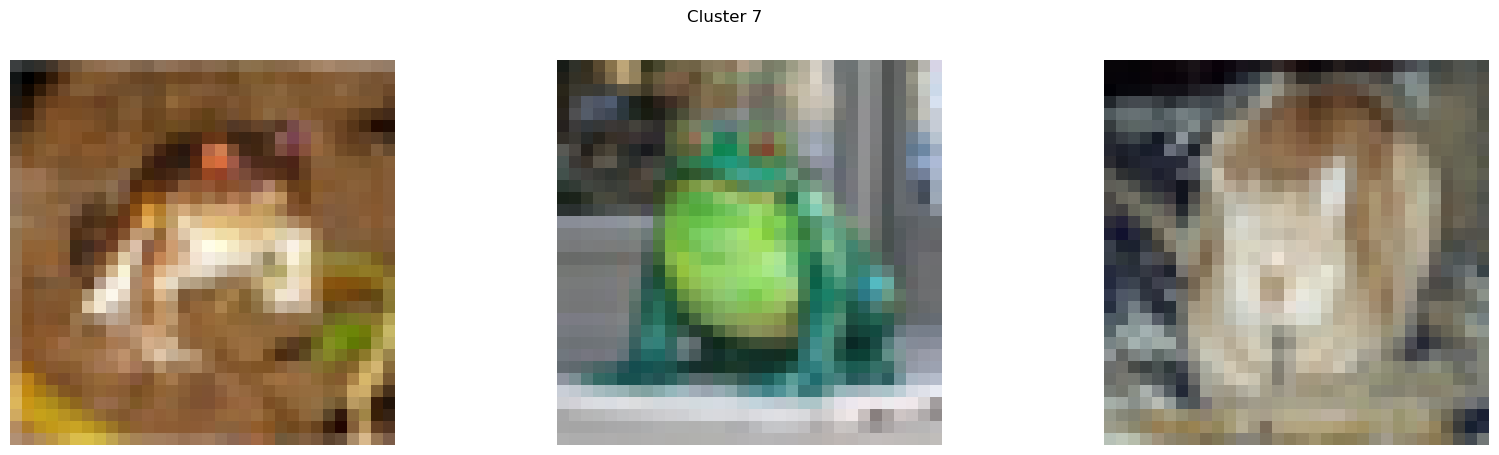

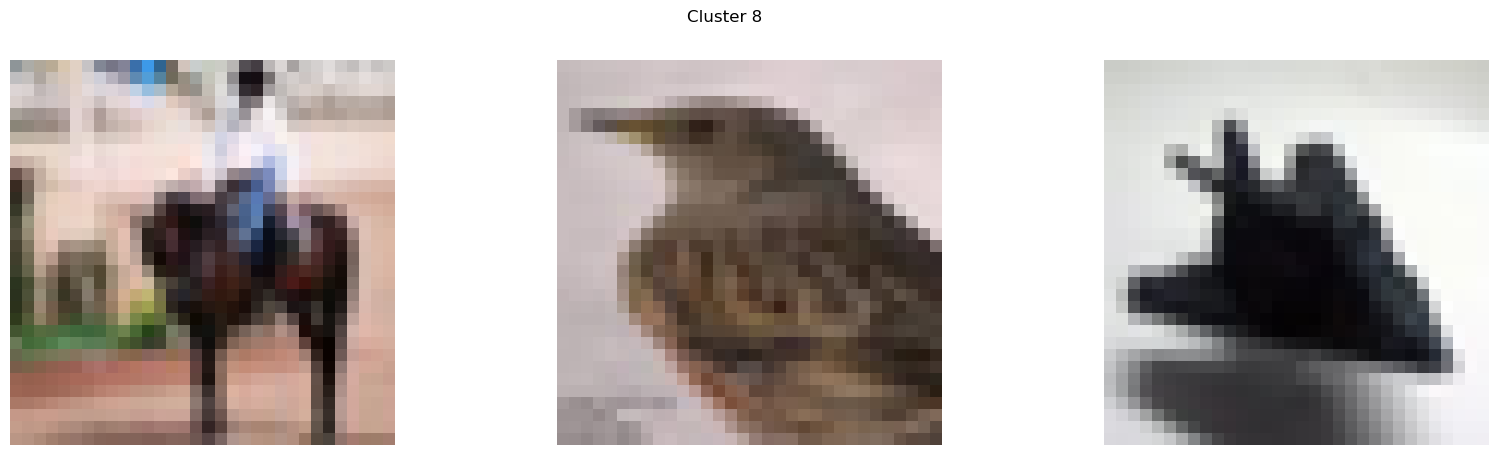

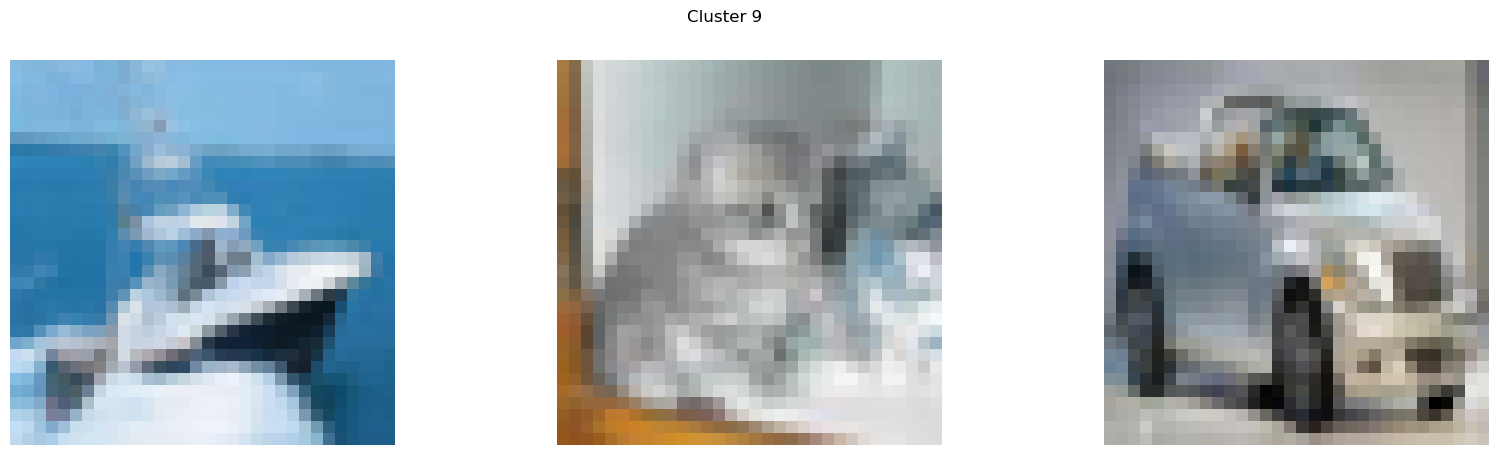

In [29]:
import numpy as np
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Preprocess the data
# Normalize the image data to [0, 1] range and flatten the 32x32x3 images into 3072-dimensional vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flattened = x_test.reshape(x_test.shape[0], -1) / 255.0

# Step 3: Apply K-means clustering
n_clusters = 10  # CIFAR-10 has 10 categories, so we'll use 10 clusters

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit KMeans on the training data
kmeans.fit(x_train_flattened)

# Step 4: Predict cluster labels for the training data
y_pred = kmeans.predict(x_train_flattened)

# Step 5: Visualize some clusters
# Let's see some sample images from one of the clusters

n_images = 3  # Number of images to display per cluster

for i in range(n_clusters):  # Loop through each cluster
    # Get indices of images that belong to the current cluster
    cluster_indices = np.where(y_pred == i)[0]
    
    # Create a figure with subplots to display sample images
    fig, axs = plt.subplots(1, n_images, figsize=(20, 5))
    
    for j in range(n_images):
        image = x_train[cluster_indices[j]]  # Get image from the training set
        axs[j].imshow(image)  # Display the image
        axs[j].axis('off')  # Hide axis
    
    plt.suptitle(f'Cluster {i}')  # Title for the cluster
    plt.show()  # Show the figure


In [39]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Preprocess the data
# Normalize the image data to [0, 1] range and flatten the 32x32x3 images into 3072-dimensional vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flattened = x_test.reshape(x_test.shape[0], -1) / 255.0

# Step 3: Apply K-means clustering
n_clusters = 10  # CIFAR-10 has 10 categories, so we'll use 10 clusters
kmeans = KMeans(n_clusters=n_clusters, max_iter=100, random_state=0, n_init=10, verbose=1)

# Fit KMeans on the training data
kmeans.fit(x_train_reduced)

# Step 4: Predict cluster labels
y_pred = kmeans.predict(x_train_reduced)

# Step 5: Calculate Scores

# Inertia (within-cluster sum of squares or WCSS)
inertia = kmeans.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(x_train_reduced, y_pred)

# Adjusted Mutual Information (AMI)
ami_score = adjusted_mutual_info_score(y_train.flatten(), y_pred)

# Step 6: Display Results
print(f"Inertia (WCSS): {inertia}")  # This will display the WCSS score
print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Mutual Information (AMI): {ami_score}")

Initialization complete
Iteration 0, inertia 6992922.428571632.
Iteration 1, inertia 4939609.290976269.
Iteration 2, inertia 4800315.15746578.
Iteration 3, inertia 4741826.256983498.
Iteration 4, inertia 4702482.909365248.
Iteration 5, inertia 4675778.382884839.
Iteration 6, inertia 4658436.049507132.
Iteration 7, inertia 4646923.605948414.
Iteration 8, inertia 4638707.042142737.
Iteration 9, inertia 4632137.101353999.
Iteration 10, inertia 4625729.654974354.
Iteration 11, inertia 4619567.68814.
Iteration 12, inertia 4614162.948267214.
Iteration 13, inertia 4609891.462117022.
Iteration 14, inertia 4606818.63071319.
Iteration 15, inertia 4604290.1651237635.
Iteration 16, inertia 4602011.629080682.
Iteration 17, inertia 4599964.833965335.
Iteration 18, inertia 4598183.695811406.
Iteration 19, inertia 4596662.9393834155.
Iteration 20, inertia 4595404.932578245.
Iteration 21, inertia 4594019.992724549.
Iteration 22, inertia 4592556.854454875.
Iteration 23, inertia 4591408.9313701205.
Itera

In [40]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Preprocess the data
# Normalize the image data to [0, 1] range and flatten the 32x32x3 images into 3072-dimensional vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flattened = x_test.reshape(x_test.shape[0], -1) / 255.0

pca = PCA(n_components=50)  # Reducing to 50 dimensions
x_train_reduced = pca.fit_transform(x_train_flattened)

# Step 3: Apply K-means clustering
n_clusters = 10  # CIFAR-10 has 10 categories, so we'll use 10 clusters
kmeans = KMeans(n_clusters=n_clusters, max_iter=100, random_state=0, n_init=10, verbose=1)

# Fit KMeans on the training data
kmeans.fit(x_train_reduced)

# Step 4: Predict cluster labels
y_pred = kmeans.predict(x_train_reduced)

# Step 5: Calculate Scores

# Inertia (within-cluster sum of squares or WCSS)
inertia = kmeans.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(x_train_reduced, y_pred)

# Adjusted Mutual Information (AMI)
ami_score = adjusted_mutual_info_score(y_train.flatten(), y_pred)

# Step 6: Display Results
print(f"Inertia (WCSS): {inertia}")  # This will display the WCSS score
print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Mutual Information (AMI): {ami_score}")

Initialization complete
Iteration 0, inertia 6944526.139077133.
Iteration 1, inertia 4752280.7086259015.
Iteration 2, inertia 4667705.927027106.
Iteration 3, inertia 4646178.90059728.
Iteration 4, inertia 4636756.58995459.
Iteration 5, inertia 4630665.955651452.
Iteration 6, inertia 4625658.901669372.
Iteration 7, inertia 4621082.612135779.
Iteration 8, inertia 4616773.271971183.
Iteration 9, inertia 4613127.782980265.
Iteration 10, inertia 4609894.082479812.
Iteration 11, inertia 4607098.643661043.
Iteration 12, inertia 4604872.101258049.
Iteration 13, inertia 4603138.501600048.
Iteration 14, inertia 4601655.724171809.
Iteration 15, inertia 4600300.384957617.
Iteration 16, inertia 4598945.437300637.
Iteration 17, inertia 4597676.177324342.
Iteration 18, inertia 4596466.105940791.
Iteration 19, inertia 4595194.165481245.
Iteration 20, inertia 4593963.055662043.
Iteration 21, inertia 4592739.705121678.
Iteration 22, inertia 4591530.46801175.
Iteration 23, inertia 4590456.669160311.
Iter

In [44]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Preprocess the data
# Normalize the image data to [0, 1] range and flatten the 32x32x3 images into 3072-dimensional vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flattened = x_test.reshape(x_test.shape[0], -1) / 255.0

# Step 3: Apply LDA
n_components = 9  # LDA can reduce to at most n_classes - 1 dimensions, so 9 in this case for CIFAR-10
lda = LDA(n_components=n_components)

# Fit LDA on the training data (LDA is supervised, so we need y_train)
x_train_reduced = lda.fit_transform(x_train_flattened, y_train.flatten())

# Step 4: Apply K-means clustering
n_clusters = 10  # CIFAR-10 has 10 categories, so we'll use 10 clusters
kmeans = KMeans(n_clusters=n_clusters, max_iter=100, random_state=0, n_init=10, verbose=1)

# Fit KMeans on the LDA-reduced data
kmeans.fit(x_train_reduced)

# Step 5: Predict cluster labels
y_pred = kmeans.predict(x_train_reduced)

# Step 6: Calculate Scores

# Inertia (within-cluster sum of squares or WCSS)
inertia = kmeans.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(x_train_reduced, y_pred)

# Adjusted Mutual Information (AMI)
ami_score = adjusted_mutual_info_score(y_train.flatten(), y_pred)

# Step 7: Display Results
print(f"Inertia (WCSS): {inertia}")  # This will display the WCSS score
print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Mutual Information (AMI): {ami_score}")

Initialization complete
Iteration 0, inertia 484427.002392318.
Iteration 1, inertia 398089.921711851.
Iteration 2, inertia 383424.677855211.
Iteration 3, inertia 376406.7469802641.
Iteration 4, inertia 372445.84130871965.
Iteration 5, inertia 369463.7485920349.
Iteration 6, inertia 367071.7110204672.
Iteration 7, inertia 365238.6993819828.
Iteration 8, inertia 363930.81281029317.
Iteration 9, inertia 363068.7681261129.
Iteration 10, inertia 362518.87724527373.
Iteration 11, inertia 362204.84689806483.
Iteration 12, inertia 362015.73225502827.
Iteration 13, inertia 361901.71147136856.
Iteration 14, inertia 361834.48454234784.
Iteration 15, inertia 361789.76009167265.
Iteration 16, inertia 361761.70711893006.
Iteration 17, inertia 361746.4321639573.
Iteration 18, inertia 361738.52461762517.
Iteration 19, inertia 361734.7376553179.
Iteration 20, inertia 361732.97740106215.
Converged at iteration 20: center shift 0.00010650836887751437 within tolerance 0.00012691394393498802.
Initializatio

Initialization complete
Iteration 0, inertia 14886920.0.
Iteration 1, inertia 11771840.0.
Iteration 2, inertia 11138056.0.
Iteration 3, inertia 10704406.0.
Iteration 4, inertia 10483338.0.
Iteration 5, inertia 10381922.0.
Iteration 6, inertia 10332929.0.
Iteration 7, inertia 10301000.0.
Iteration 8, inertia 10278992.0.
Iteration 9, inertia 10261764.0.
Iteration 10, inertia 10249542.0.
Iteration 11, inertia 10241002.0.
Iteration 12, inertia 10234936.0.
Iteration 13, inertia 10229376.0.
Iteration 14, inertia 10224815.0.
Iteration 15, inertia 10219999.0.
Iteration 16, inertia 10215090.0.
Iteration 17, inertia 10210329.0.
Iteration 18, inertia 10206426.0.
Iteration 19, inertia 10203657.0.
Iteration 20, inertia 10201566.0.
Iteration 21, inertia 10199796.0.
Iteration 22, inertia 10198232.0.
Iteration 23, inertia 10197366.0.
Converged at iteration 23: center shift 0.05480675771832466 within tolerance 0.10354732666015626.
Initialization complete
Iteration 0, inertia 14482897.0.
Iteration 1, in

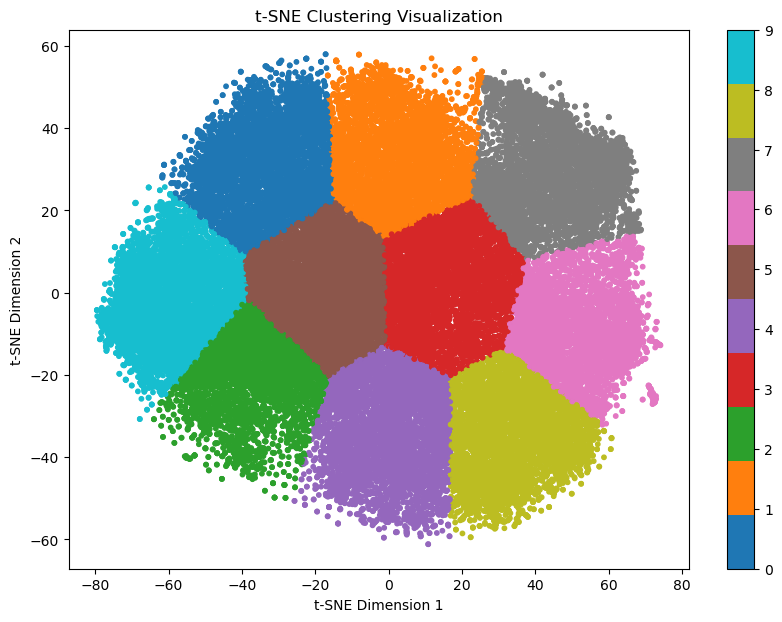

In [46]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Preprocess the data
# Normalize the image data to [0, 1] range and flatten the 32x32x3 images into 3072-dimensional vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test_flattened = x_test.reshape(x_test.shape[0], -1) / 255.0

# Step 3: Apply t-SNE for dimensionality reduction to 2D
n_components = 2  # t-SNE typically reduces to 2D or 3D for visualization
tsne = TSNE(n_components=n_components, perplexity=30, n_iter=1000, random_state=0)

# Fit t-SNE on the training data
x_train_reduced = tsne.fit_transform(x_train_flattened)

# Step 4: Apply K-means clustering
n_clusters = 10  # CIFAR-10 has 10 categories, so we'll use 10 clusters
kmeans = KMeans(n_clusters=n_clusters, max_iter=100, random_state=0, n_init=10, verbose=1)

# Fit KMeans on the t-SNE-reduced data
kmeans.fit(x_train_reduced)

# Step 5: Predict cluster labels
y_pred = kmeans.predict(x_train_reduced)

# Step 6: Calculate Scores

# Inertia (within-cluster sum of squares or WCSS)
inertia = kmeans.inertia_

# Silhouette Score (works better with more than 2 dimensions but can still be used)
silhouette_avg = silhouette_score(x_train_reduced, y_pred)

# Adjusted Mutual Information (AMI)
ami_score = adjusted_mutual_info_score(y_train.flatten(), y_pred)

# Step 7: Display Results
print(f"Inertia (WCSS): {inertia}")  # This will display the WCSS score
print(f"Silhouette Score: {silhouette_avg}")
print(f"Adjusted Mutual Information (AMI): {ami_score}")

# Step 8: Visualize the t-SNE-reduced data (2D plot)
plt.figure(figsize=(10, 7))
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_pred, cmap='tab10', s=10)
plt.colorbar()
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()